In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

In [2]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df = df.drop("id", axis = 1)
print(df.shape)

(569, 32)


In [4]:
df = df.drop(df.columns[31], axis = 1)
df.rename(columns = {"diagnosis": "target"}, inplace = True)
df["target"] = [1 if i.strip() == 'M' else 0 for i in df["target"]]

In [5]:
labels = df["target"]

In [6]:
df = df.drop("target", axis = 1)

In [7]:
scaler = preprocessing.StandardScaler()
df_scaled = scaler.fit_transform(df)

In [8]:
x_scaled=df_scaled
y=labels.values

# DBSCAN

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import normalized_mutual_info_score

In [10]:
class dbscan_imp():
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
        self.cluster_count=int(1)
        self.labels_=None
        self.val=0
    def dis(self,x1,x2):
        return np.sqrt(np.sum((x1-x2) ** 2))
        
    def fetch_nearest(self,X,ind):
        nearest = []
        for i in range(X.shape[0]):
            if self.dis(X[ind], X[i]) <= self.eps:
                nearest.append(i)
        return nearest
    
    def update_clus(self,X,index,nearest):
        self.labels_[index] = self.cluster_count
        i=0
        while i<len(nearest):
            if self.labels_[nearest[i]] == -1:
                self.labels_[nearest[i]] = self.cluster_count
            elif self.labels_[nearest[i]] == 0:
                self.labels_[nearest[i]] = self.cluster_count
                temp_nearest= self.fetch_nearest(X, nearest[i])
                if len(temp_nearest) >= self.min_samples:
                    nearest += temp_nearest
            i+=1
    def fit(self,x):
        self.labels_ = np.zeros(x.shape[0],dtype=int)
        
        for i in range(x.shape[0]):
            if self.labels_[i]==0:
                nearest=self.fetch_nearest(x,i)
                if len(nearest)>self.min_samples:
                    self.update_clus(x, i, nearest)
                    self.cluster_count+=1
                else:
                    self.labels_[i]=-1
            else:
                continue
    

## Hyperparameter tuning of eps, min_value

In [11]:
sc1_li  = []
nml_li = []
max_sc1 = -2
max_nml = -2
sc1 = None
nml  =  None
sc1_ieps = None
sc1_imins = None
nml_ieps = None
nml_imins = None
isc1 = None
inml = None

for i in np.linspace(0.1,20,150):
    for j in np.linspace(1,20,20):
        dbs  =  DBSCAN(eps = i,min_samples = int(j)).fit(x_scaled)
        try:
            sc1  =  silhouette_score(x_scaled,dbs.labels_)
            nml  =  normalized_mutual_info_score(y,dbs.labels_)
            sc1_li.append(sc1)
            nml_li.append(nml)
            if nml > max_nml:
                nml_ieps = i
                nml_imins = j
                inml = nml
            if sc1 > max_sc1:
                sc1_ieps = i
                sc1_imins = j
                isc1 = sc1
                    
        except:
            sc1_li.append(-1)
            nml_li.append(0)
                

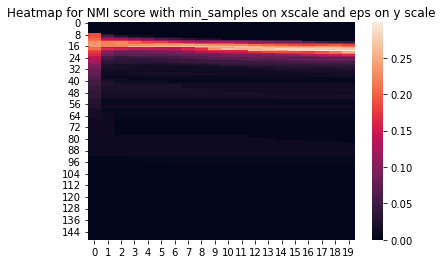

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sn


nm = [nml_li[i:i+20] for i in range(0, len(nml_li), 20)]

# plotting the heatmap
hm = sn.heatmap(data = nm)

# displaying the plotted heatmap
plt.title("Heatmap for NMI score with min_samples on xscale and eps on y scale")
plt.show()

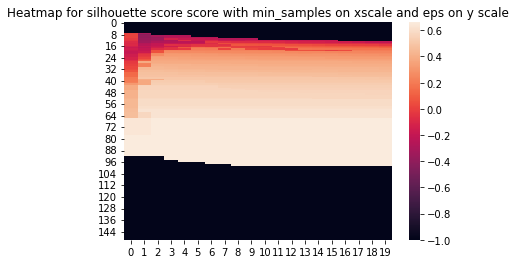

In [13]:
sc = [sc1_li[i:i+20] for i in range(0, len(sc1_li), 20)]


# plotting the heatmap
hm = sn.heatmap(data = sc)

# displaying the plotted heatmap

#plt.yticks(eps_y,eps_y)
plt.title("Heatmap for silhouette score score with min_samples on xscale and eps on y scale")
plt.show()

In [14]:
print(isc1,sc1_ieps, sc1_imins)
print(inml,nml_ieps, nml_imins)


0.6566253575806831 13.188590604026844 20.0
0.005162477750374118 13.188590604026844 20.0


We can see that both silhouette score score and NMI score were maximum when eps=13.188590604026844 and min_samples=20.
Therefore, we select these values and perform dbscan.

## Execution

In [15]:
#My implementation
db_imp = dbscan_imp(eps=13.188590604026844, min_samples=20)
db_imp.fit(x_scaled)

In [16]:
#sklearn implementation
db = DBSCAN(eps=13.188590604026844, min_samples=20)
db.fit(x_scaled)

DBSCAN(eps=13.188590604026844, min_samples=20)

In [17]:
normalized_mutual_info_score(db.labels_,db_imp.labels_)

1.0

We can see that nmi score between my implemention output and sklearn output is 1 which implies that my implementation is working completely similar to sklearn library. Hurray!

In [18]:
# I am running the algorithm multiple times by shufling the data to plot the error bars.
sc_li=[]
nml_li=[]
for i in range(1,11):
    p = np.random.permutation(len(x_scaled))
    x_scaled_p = x_scaled[p]
    y_p=y[p]
    dbs  =  dbscan_imp(eps = 13.188590604026844,min_samples = 20)
    dbs.fit(x_scaled_p)
    sc1  =  silhouette_score(x_scaled_p,dbs.labels_)
    nml  =  normalized_mutual_info_score(y_p,dbs.labels_)
    sc_li.append(sc1)
    nml_li.append(nml)

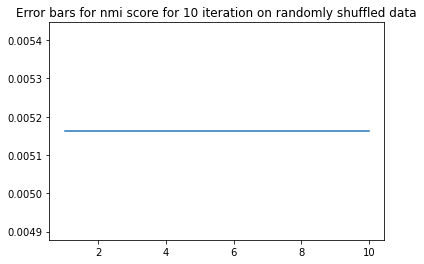

In [19]:
r = list(range(1,11))
plt.errorbar(x=r,y=nml_li,yerr=np.std(nml_li),elinewidth=10)
plt.title("Error bars for nmi score for 10 iteration on randomly shuffled data")
plt.show()

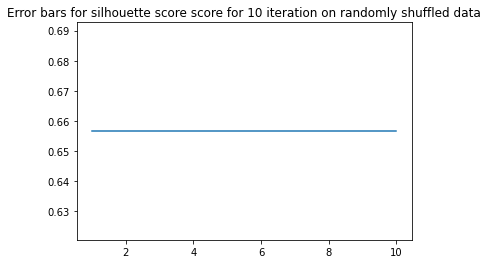

In [20]:
plt.errorbar(x=r,y=sc_li,yerr=np.std(sc_li),elinewidth=10)
plt.title("Error bars for silhouette score score for 10 iteration on randomly shuffled data")
plt.show()

In [21]:
print(np.mean(nml_li),np.mean(sc_li))

0.005162477750374117 0.6566253575806831


## Implementation Correctness

In [22]:
adf = pd.read_csv('arti_data.csv')

In [23]:
adf

,Feature 1,Feature 2,Class/Cluster
0,0.020,0.000000,1
1,1.045,0.000000,1
2,2.080,0.000000,1
3,3.125,0.000000,1
4,4.180,0.000000,1
5,5.245,0.000000,1
6,6.320,0.000000,1
7,7.405,0.000000,1
8,8.500,0.000000,1
9,9.605,0.000000,1


In [24]:
adf_y=adf["Class/Cluster"].values
adf_x=adf.drop("Class/Cluster",axis=1).values

In [25]:
class dbscan_imp():
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
        self.cluster_count=int(1)
        self.labels_=None
        self.val=0
        self.vs=[]
    def dis(self,x1,x2):
        return np.sqrt(np.sum((x1-x2) ** 2))
        
    def fetch_nearest(self,X,ind):
        nearest = []
        for i in range(X.shape[0]):
            if self.dis(X[ind], X[i]) <= self.eps:
                nearest.append(i)
        return nearest
    
    def update_clus(self,X,index,nearest):
        if (index,"c") not in self.vs:
            self.vs.append((index,"c"))
        self.labels_[index] = self.cluster_count
        i=0
        while i<len(nearest):
            if self.labels_[nearest[i]] == -1:
                if (nearest[i],"nc") not in self.vs:
                    self.vs.append((nearest[i],"nc"))
                self.labels_[nearest[i]] = self.cluster_count
            elif self.labels_[nearest[i]] == 0:
                
                self.labels_[nearest[i]] = self.cluster_count
                temp_nearest= self.fetch_nearest(X, nearest[i])
                if len(temp_nearest) > self.min_samples:
                    if (nearest[i],"c") not in self.vs:
                        self.vs.append((nearest[i],"c"))
                    nearest += temp_nearest
                else:
                    if (nearest[i],"nc") not in self.vs:
                        self.vs.append((nearest[i],"nc"))
            i+=1
    def fit(self,x):
        self.labels_ = np.zeros(x.shape[0],dtype=int)
        
        for i in range(x.shape[0]):
            if self.labels_[i]==0:
                
                nearest=self.fetch_nearest(x,i)
                if len(nearest)>self.min_samples:
                    self.update_clus(x, i, nearest)
                    self.cluster_count+=1
                else:
                    if (i,"nc") not in self.vs:
                        self.vs.append((i,"nc"))
                    self.labels_[i]=-1
            else:
                continue
    

In [26]:
db_imp = dbscan_imp(eps=1.25, min_samples=2)
db_imp.fit(adf_x)

In [27]:
order=[0]*adf_x.shape[0]
ct=1
for i in range(len(db_imp.vs)):
    order[db_imp.vs[i][0]]=ct
    ct+=1
       

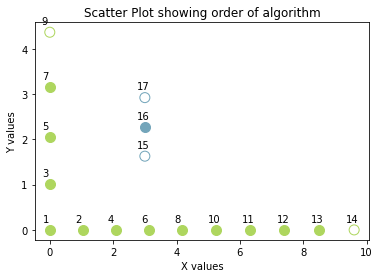

In [28]:
import matplotlib.colors as mcolors
x_values = adf_x[:,0]
y_values = adf_x[:,1]

unique_labels=np.unique(db_imp.labels_)
rgb_values = np.random.rand(len(unique_labels), 3)
# Convert the RGB values to hexadecimal color codes
hex_colors = [mcolors.to_hex(rgb_values[i]) for i in range(len(unique_labels))]

# Map each label to its corresponding color
colors = [hex_colors[list(unique_labels).index(label)] for label in db_imp.labels_]
fc_list=colors.copy()
for i in db_imp.vs:
    if i[1]=="nc":
        fc_list[i[0]]="none"

seq=0
for i in range(len(x_values)):
    plt.annotate(order[seq], xy=(x_values[i], y_values[i]), xytext=(-8, 8), textcoords='offset points')
    plt.scatter(x_values[i], y_values[i], s=100, facecolors=fc_list[i], edgecolors=colors[i])

    seq+=1


plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot showing order of algorithm')

# Display the plot
plt.show()